In [2]:
import pandas as pd
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.rcParams["figure.figsize"] = [10, 6]

# Analiza dynamiki fiksacji

In [3]:
Lmin = 2
Lmax = 22
WINDOW_SIZE = 5
results = join('..', 'results', 'results_for_paper')

In [4]:
### DATA LOADING


wmc_low_lev_easy = pd.read_csv(join(results, 'dynamics_WMC_LOW_LEV_EASY.csv'))
wmc_med_lev_easy = pd.read_csv(join(results, 'dynamics_WMC_MED_LEV_EASY.csv'))
wmc_high_lev_easy = pd.read_csv(join(results, 'dynamics_WMC_HIGH_LEV_EASY.csv'))

wmc_low_lev_med = pd.read_csv(join(results, 'dynamics_WMC_LOW_LEV_MED.csv'))
wmc_med_lev_med = pd.read_csv(join(results, 'dynamics_WMC_MED_LEV_MED.csv'))
wmc_high_lev_med = pd.read_csv(join(results, 'dynamics_WMC_HIGH_LEV_MED.csv'))

wmc_low_lev_hard = pd.read_csv(join(results, 'dynamics_WMC_LOW_LEV_HARD.csv'))
wmc_med_lev_hard = pd.read_csv(join(results, 'dynamics_WMC_MED_LEV_HARD.csv'))
wmc_high_lev_hard = pd.read_csv(join(results, 'dynamics_WMC_HIGH_LEV_HARD.csv'))

wmc_low_full = pd.read_csv(join(results, 'dynamics_WMC_LOW_FULL.csv'))
wmc_low_corr = pd.read_csv(join(results, 'dynamics_WMC_LOW_CORR.csv'))
wmc_low_err = pd.read_csv(join(results, 'dynamics_WMC_LOW_ERR.csv'))

wmc_med_full = pd.read_csv(join(results, 'dynamics_WMC_MED_FULL.csv'))
wmc_med_corr = pd.read_csv(join(results, 'dynamics_WMC_MED_CORR.csv'))
wmc_med_err = pd.read_csv(join(results, 'dynamics_WMC_MED_ERR.csv'))

wmc_high_full = pd.read_csv(join(results, 'dynamics_WMC_HIGH_FULL.csv'))
wmc_high_corr = pd.read_csv(join(results, 'dynamics_WMC_HIGH_CORR.csv'))
wmc_high_err = pd.read_csv(join(results, 'dynamics_WMC_HIGH_ERR.csv'))


# Divide PROP by WINDOW SIZE, TO MAKE IT PROPORTIONAL 

wmc_low_lev_easy['PROP_FOx'] /= WINDOW_SIZE
wmc_med_lev_easy['PROP_FOx'] /= WINDOW_SIZE
wmc_high_lev_easy['PROP_FOx'] /= WINDOW_SIZE
wmc_low_lev_med['PROP_FOx'] /= WINDOW_SIZE
wmc_med_lev_med['PROP_FOx'] /= WINDOW_SIZE
wmc_high_lev_med['PROP_FOx'] /= WINDOW_SIZE
wmc_low_lev_hard['PROP_FOx'] /= WINDOW_SIZE
wmc_med_lev_hard['PROP_FOx'] /= WINDOW_SIZE
wmc_high_lev_hard['PROP_FOx'] /= WINDOW_SIZE

wmc_low_full['PROP_FOx'] /= WINDOW_SIZE
wmc_low_corr['PROP_FOx'] /= WINDOW_SIZE
wmc_low_err['PROP_FOx'] /= WINDOW_SIZE
wmc_med_full['PROP_FOx'] /= WINDOW_SIZE
wmc_med_corr['PROP_FOx'] /= WINDOW_SIZE
wmc_med_err['PROP_FOx'] /= WINDOW_SIZE
wmc_high_full['PROP_FOx'] /= WINDOW_SIZE
wmc_high_corr['PROP_FOx'] /= WINDOW_SIZE
wmc_high_err['PROP_FOx'] /= WINDOW_SIZE

wmc_low_lev_easy['FOx_STD'] /= WINDOW_SIZE
wmc_med_lev_easy['FOx_STD'] /= WINDOW_SIZE
wmc_high_lev_easy['FOx_STD'] /= WINDOW_SIZE
wmc_low_lev_med['FOx_STD'] /= WINDOW_SIZE
wmc_med_lev_med['FOx_STD'] /= WINDOW_SIZE
wmc_high_lev_med['FOx_STD'] /= WINDOW_SIZE
wmc_low_lev_hard['FOx_STD'] /= WINDOW_SIZE
wmc_med_lev_hard['FOx_STD'] /= WINDOW_SIZE
wmc_high_lev_hard['FOx_STD'] /= WINDOW_SIZE

wmc_low_full['FOx_STD'] /= WINDOW_SIZE
wmc_low_corr['FOx_STD'] /= WINDOW_SIZE
wmc_low_err['FOx_STD'] /= WINDOW_SIZE
wmc_med_full['FOx_STD'] /= WINDOW_SIZE
wmc_med_corr['FOx_STD'] /= WINDOW_SIZE
wmc_med_err['FOx_STD'] /= WINDOW_SIZE
wmc_high_full['FOx_STD'] /= WINDOW_SIZE
wmc_high_corr['FOx_STD'] /= WINDOW_SIZE
wmc_high_err['FOx_STD'] /= WINDOW_SIZE

# Predziały ufności
1.96 razy odchylenie standardowe danej miary (tzn. albo PROP_FO albo AVG_RM) podzielone przez pierwiastek kwadratowy z liczby triali dla tej sekundy (czyli Kx): 1.96*(SDx/SQRT(Kx)) [inaczej 1.96 razy błąd standardowy miary w danej sekundzie].

In [5]:
def add_CI(data, param, corr = None):
    N = {'PROP_FOx': 'Kx', 'AVG_RMx': 'RMk'}[param]
    STD = {'PROP_FOx': 'FOx_STD', 'AVG_RMx': 'RMx_STD'}[param]
    if not (corr is None):
        data[param + '_low_CI'] = data[param] - (1.96 * corr[STD] / np.sqrt(corr[N]))
        data[param + '_high_CI'] = data[param] + (1.96 * corr[STD] / np.sqrt(corr[N]))
    else:
        data[param + '_low_CI'] = data[param] - (1.96 * data[STD] / np.sqrt(data[N]))
        data[param + '_high_CI'] = data[param] + (1.96 * data[STD] / np.sqrt(data[N]))
      
        
# def add_CI_PROP(data):
#     data["PROP_FOx_low_CI"] = data['PROP_FOx'] -  (1.96 * (data.FOx_STD / np.sqrt(data.Kx)))
#     data["PROP_FOx_high_CI"] = data["PROP_FOx"] +  (1.96 * (data.FOx_STD / np.sqrt(data.Kx)))
    
# def add_CI_RM(data):
#     data["AVG_RMx_low_CI"] = data['AVG_RMx'] -  (1.96 * (data.RMx_STD / np.sqrt(data.RMk)))
#     data["AVG_RMx_high_CI"] = data['AVG_RMx'] +  (1.96 * (data.RMx_STD / np.sqrt(data.RMk)))
    
def plot_CI(data, param,labels, title):
    # Define a function for the line plot with intervals
    _, ax = plt.subplots()

    # Plot the data, set the linewidth, color and transparency of the
    # line, provide a label for the legend
    ax.plot([x * WINDOW_SIZE for x in data[0][param].index.tolist()],
            data[0][param].tolist(), 
            lw = 1,
            color = 'green',
            alpha = 1,
            label = labels[0])
    # Shade the confidence interval
    ax.fill_between([x * WINDOW_SIZE for x in data[0][param].index.tolist()],
                    data[0][param+"_low_CI"],
                    data[0][param+"_high_CI"], 
                    color = 'green',
                    alpha = 0.4,
                    label = '95% CI')

    ax.plot([x * WINDOW_SIZE for x in data[1][param].index.tolist()],
            data[1][param].tolist(), 
            lw = 1,
            color = 'red',
            alpha = 1,
            label = labels[1])
    # Shade the confidence interval
    ax.fill_between([x * WINDOW_SIZE for x in data[1][param].index.tolist()],
                    data[1][param+"_low_CI"],
                    data[1][param+"_high_CI"], 
                    color = 'red',
                    alpha = 0.4,
                    label = '95% CI')
    if len(data) == 3:
        ax.plot([x * WINDOW_SIZE for x in data[2][param].index.tolist()],
                data[2][param].tolist(), 
                lw = 1,
                color = 'blue',
                alpha = 1,
                label = labels[2])
        # Shade the confidence interval
        ax.fill_between([x * WINDOW_SIZE for x in data[2][param].index.tolist()],
                        data[2][param+"_low_CI"],
                        data[2][param+"_high_CI"], 
                        color = 'blue',
                        alpha = 0.4,
                        label = '95% CI')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel('Time of experiment(s)')
    ax.set_ylabel(param)
    ax.set_xlim([WINDOW_SIZE * Lmin,WINDOW_SIZE * (Lmax-1)])
#     ax.set_ylim([0,1])

        # Display legend
    ax.legend(loc = 'best')


# I. WMC ON LEVEL

## WMC LOW

### PROP FOX 

In [6]:
add_CI(wmc_low_lev_easy, 'PROP_FOx')
add_CI(wmc_low_lev_med, 'PROP_FOx')
add_CI(wmc_low_lev_hard, 'PROP_FOx')

<IPython.core.display.Javascript object>


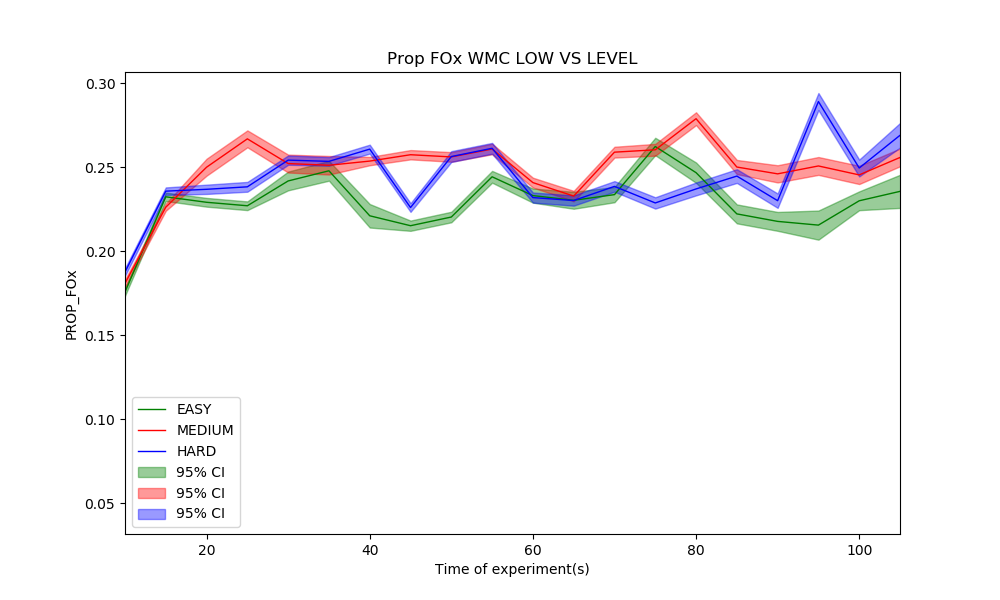

In [7]:
plot_CI([wmc_low_lev_easy, wmc_low_lev_med, wmc_low_lev_hard], 'PROP_FOx', ['EASY', 'MEDIUM', 'HARD'], 'Prop FOx WMC LOW VS LEVEL')

### AVG RM 

In [8]:
add_CI(wmc_low_lev_easy, 'AVG_RMx')
add_CI(wmc_low_lev_med, 'AVG_RMx')
add_CI(wmc_low_lev_hard, 'AVG_RMx')

<IPython.core.display.Javascript object>


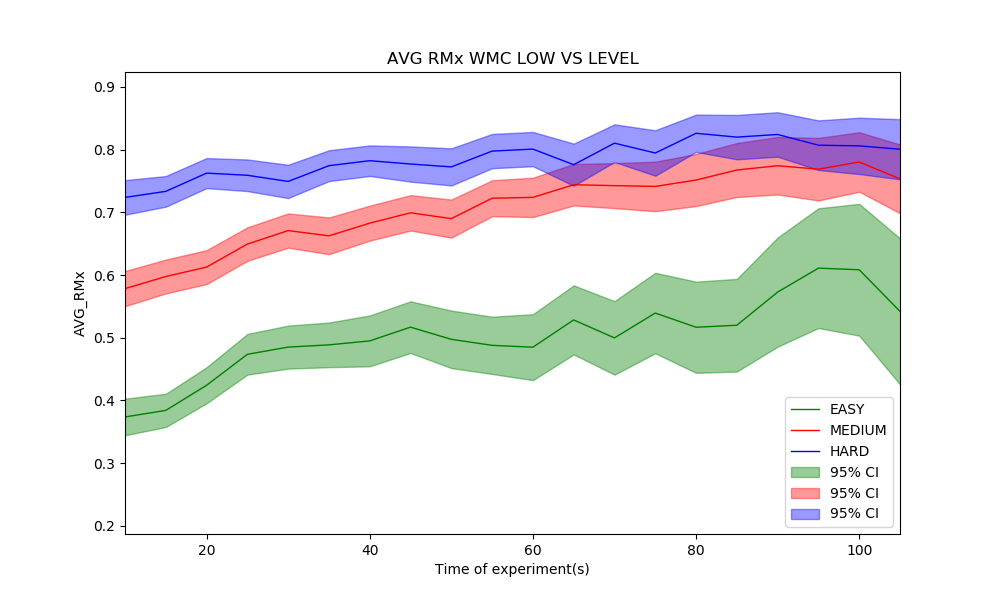

In [9]:
plot_CI([wmc_low_lev_easy, wmc_low_lev_med, wmc_low_lev_hard], 'AVG_RMx', ['EASY', 'MEDIUM', 'HARD'], 'AVG RMx WMC LOW VS LEVEL')

## WMC MED

### PROP FOX 

In [10]:
add_CI(wmc_med_lev_easy, 'PROP_FOx')
add_CI(wmc_med_lev_med, 'PROP_FOx')
add_CI(wmc_med_lev_hard, 'PROP_FOx')

<IPython.core.display.Javascript object>


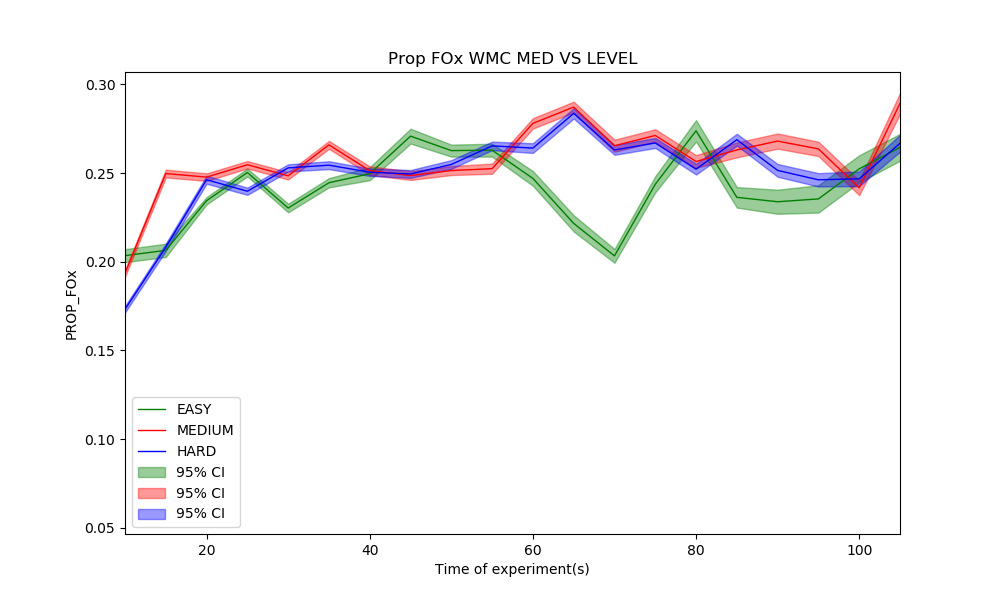

In [11]:
plot_CI([wmc_med_lev_easy, wmc_med_lev_med, wmc_med_lev_hard], 'PROP_FOx', ['EASY', 'MEDIUM', 'HARD'], 'Prop FOx WMC MED VS LEVEL')

### AVG RM 

In [12]:
add_CI(wmc_med_lev_easy, 'AVG_RMx')
add_CI(wmc_med_lev_med, 'AVG_RMx')
add_CI(wmc_med_lev_hard, 'AVG_RMx')

<IPython.core.display.Javascript object>


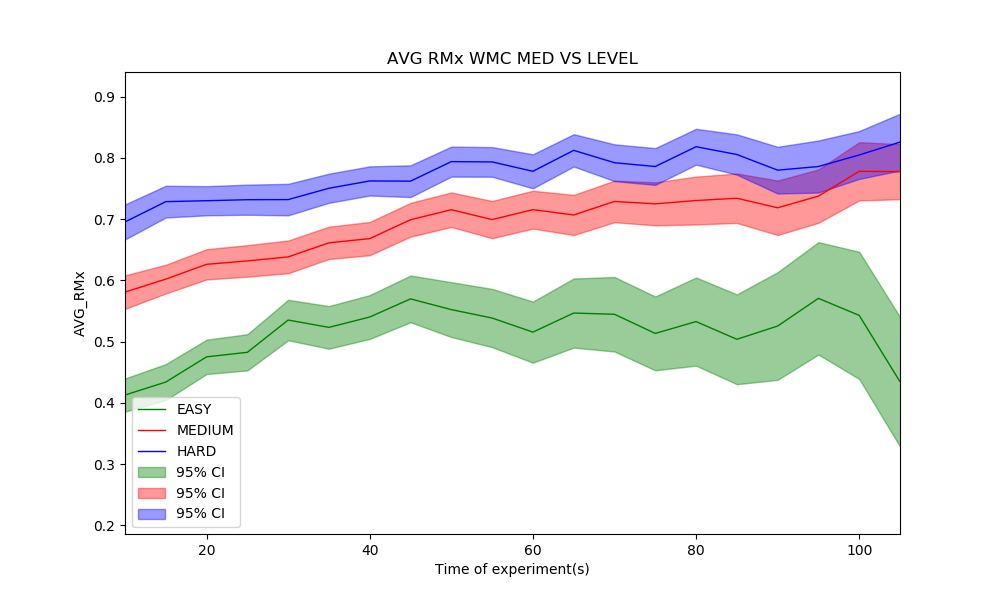

In [13]:
plot_CI([wmc_med_lev_easy, wmc_med_lev_med, wmc_med_lev_hard], 'AVG_RMx', ['EASY', 'MEDIUM', 'HARD'], 'AVG RMx WMC MED VS LEVEL')

## WMC HIGH

### PROP FOX 

In [14]:
add_CI(wmc_high_lev_easy, 'PROP_FOx')
add_CI(wmc_high_lev_med, 'PROP_FOx')
add_CI(wmc_high_lev_hard, 'PROP_FOx')

<IPython.core.display.Javascript object>


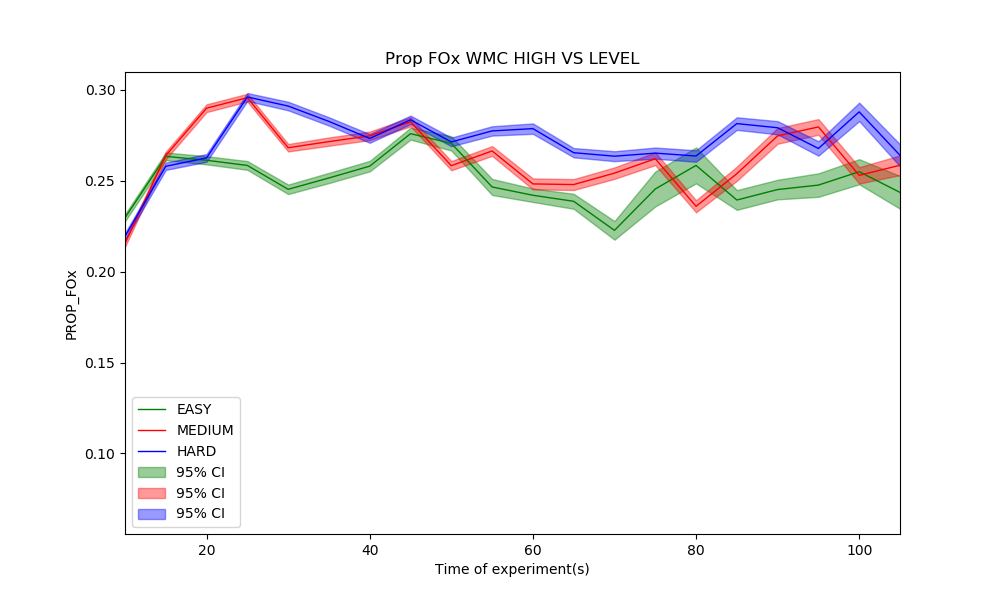

In [15]:
plot_CI([wmc_high_lev_easy, wmc_high_lev_med, wmc_high_lev_hard], 'PROP_FOx', ['EASY', 'MEDIUM', 'HARD'], 'Prop FOx WMC HIGH VS LEVEL')

### AVG RM 

In [16]:
add_CI(wmc_high_lev_easy, 'AVG_RMx')
add_CI(wmc_high_lev_med, 'AVG_RMx')
add_CI(wmc_high_lev_hard, 'AVG_RMx')

<IPython.core.display.Javascript object>


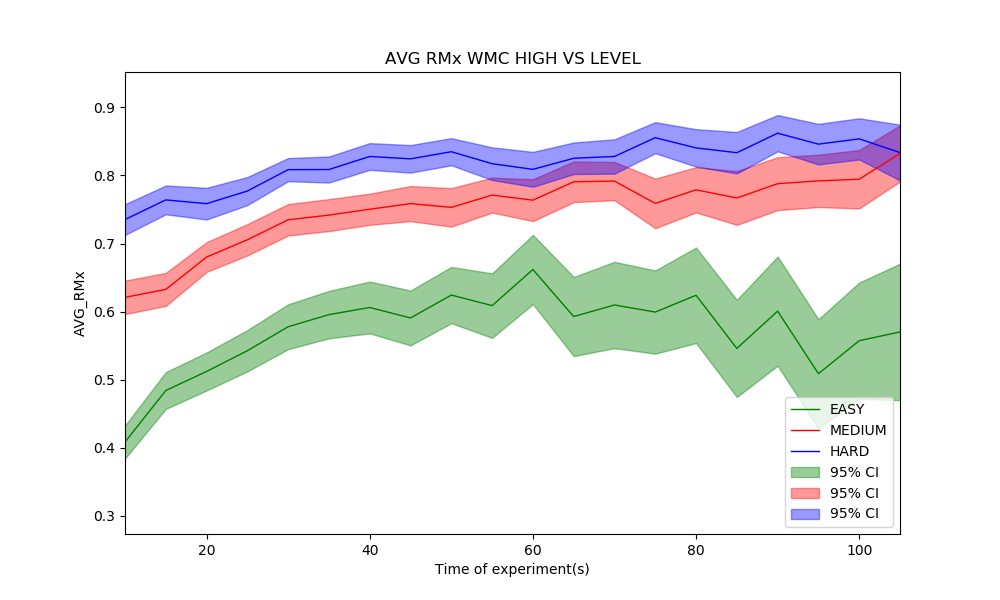

In [17]:
plot_CI([wmc_high_lev_easy, wmc_high_lev_med, wmc_high_lev_hard], 'AVG_RMx', ['EASY', 'MEDIUM', 'HARD'], 'AVG RMx WMC HIGH VS LEVEL')

# II. LEVEL ON WMC

## LEVEL EASY

### PROP FOX 

<IPython.core.display.Javascript object>


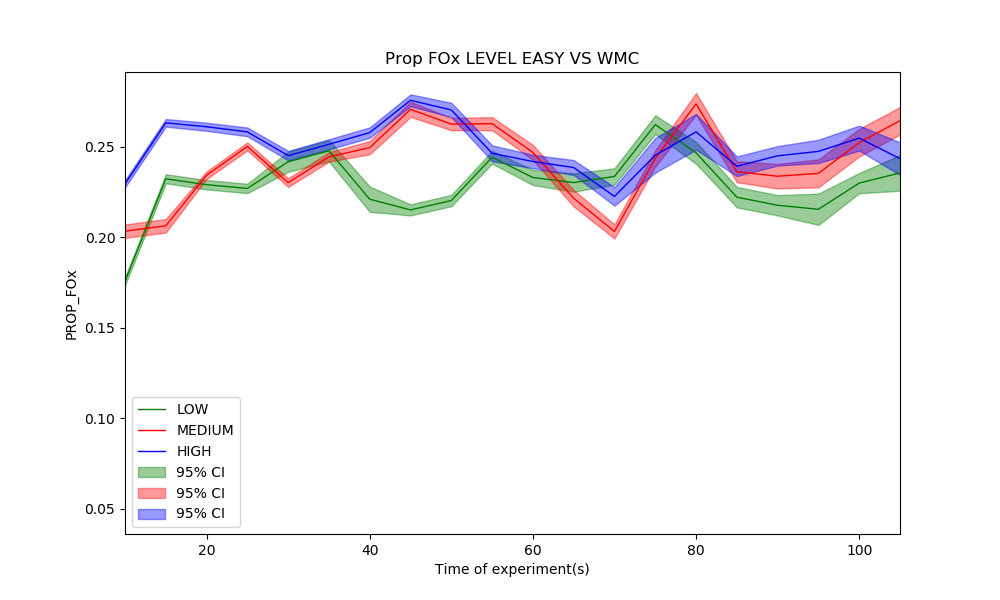

In [18]:
plot_CI([wmc_low_lev_easy, wmc_med_lev_easy, wmc_high_lev_easy], 'PROP_FOx', ['LOW', 'MEDIUM', 'HIGH'], 'Prop FOx LEVEL EASY VS WMC')

### AVG RM 

<IPython.core.display.Javascript object>


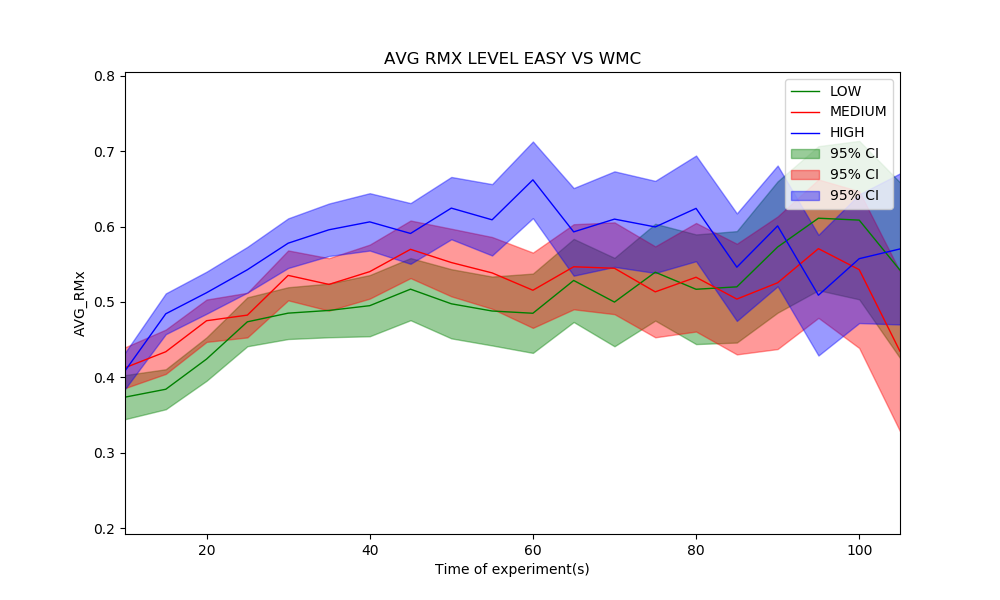

In [19]:
plot_CI([wmc_low_lev_easy, wmc_med_lev_easy, wmc_high_lev_easy], 'AVG_RMx', ['LOW', 'MEDIUM', 'HIGH'], 'AVG RMX LEVEL EASY VS WMC')

## LEV MED

### PROP FOX 

<IPython.core.display.Javascript object>


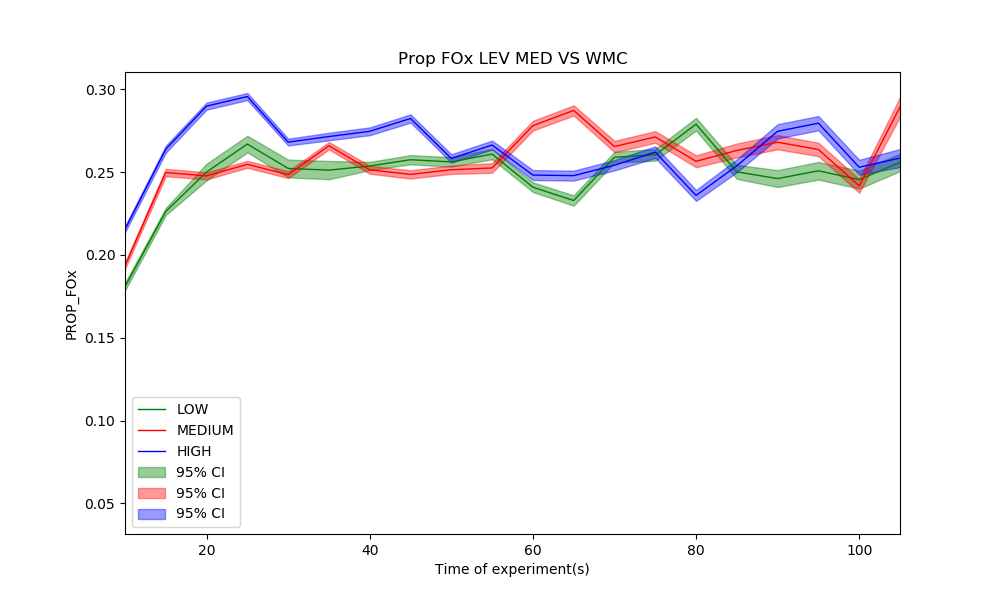

In [20]:
plot_CI([wmc_low_lev_med, wmc_med_lev_med, wmc_high_lev_med], 'PROP_FOx', ['LOW', 'MEDIUM', 'HIGH'], 'Prop FOx LEV MED VS WMC')

### AVG RM 

<IPython.core.display.Javascript object>


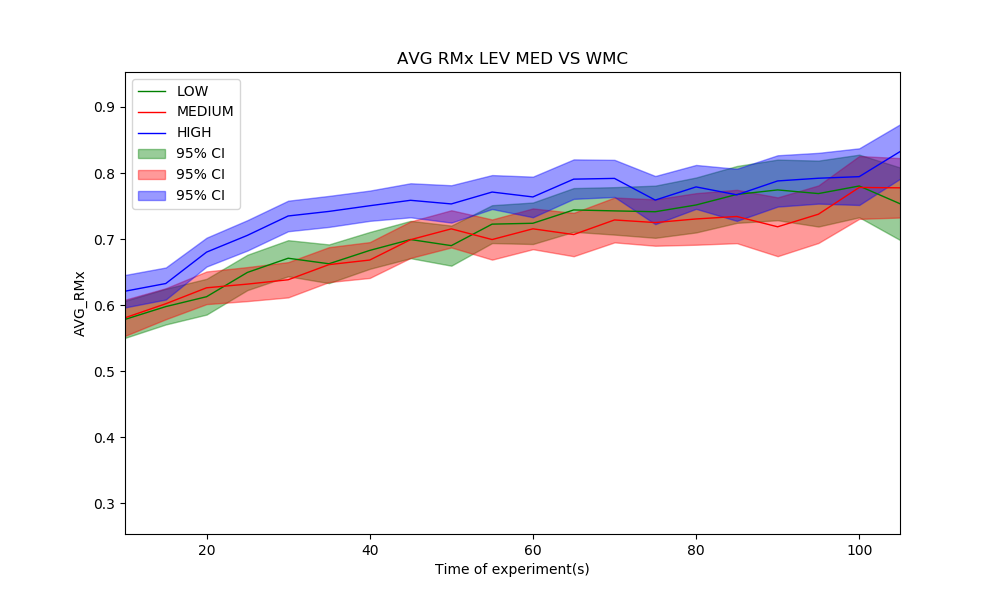

In [21]:
plot_CI([wmc_low_lev_med, wmc_med_lev_med, wmc_high_lev_med], 'AVG_RMx', ['LOW', 'MEDIUM', 'HIGH'], 'AVG RMx LEV MED VS WMC')

## LEVEL HARD

### PROP FOX 

<IPython.core.display.Javascript object>


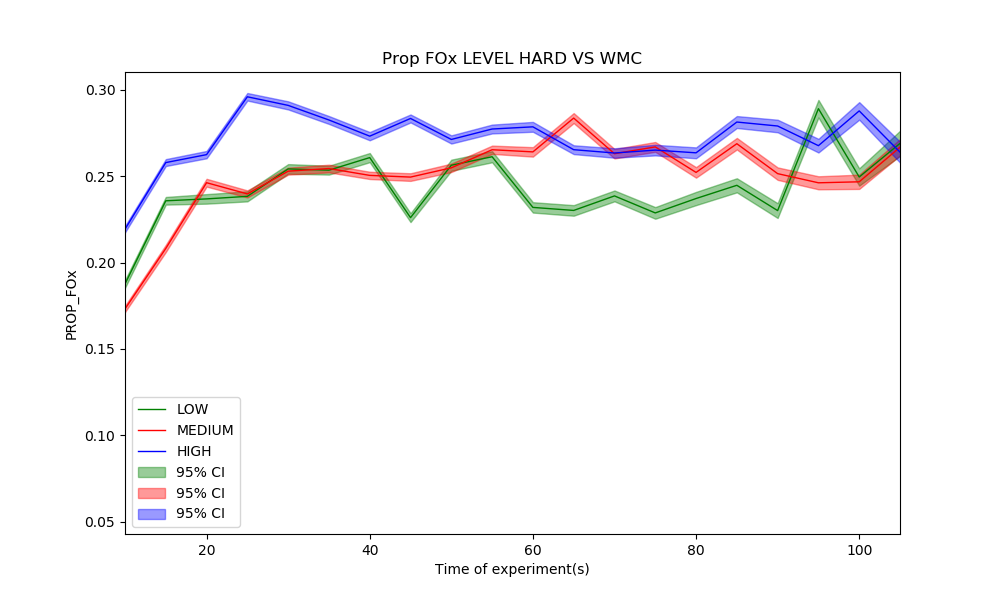

In [22]:
plot_CI([wmc_low_lev_hard, wmc_med_lev_hard, wmc_high_lev_hard], 'PROP_FOx', ['LOW', 'MEDIUM', 'HIGH'], 'Prop FOx LEVEL HARD VS WMC')

### AVG RM 

<IPython.core.display.Javascript object>


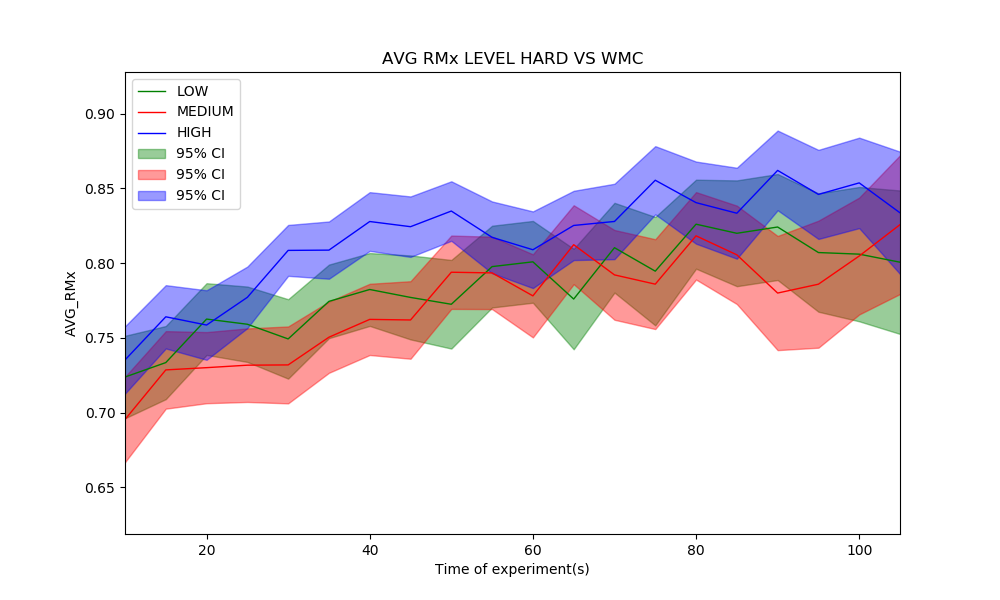

In [23]:
plot_CI([wmc_low_lev_hard, wmc_med_lev_hard, wmc_high_lev_hard], 'AVG_RMx', ['LOW', 'MEDIUM', 'HIGH'], 'AVG RMx LEVEL HARD VS WMC')

# III. WMC ON CORR 

# AVG_RMx

In [24]:
add_CI(wmc_low_full, 'AVG_RMx')
add_CI(wmc_low_corr, 'AVG_RMx')
add_CI(wmc_low_err, 'AVG_RMx')

<IPython.core.display.Javascript object>


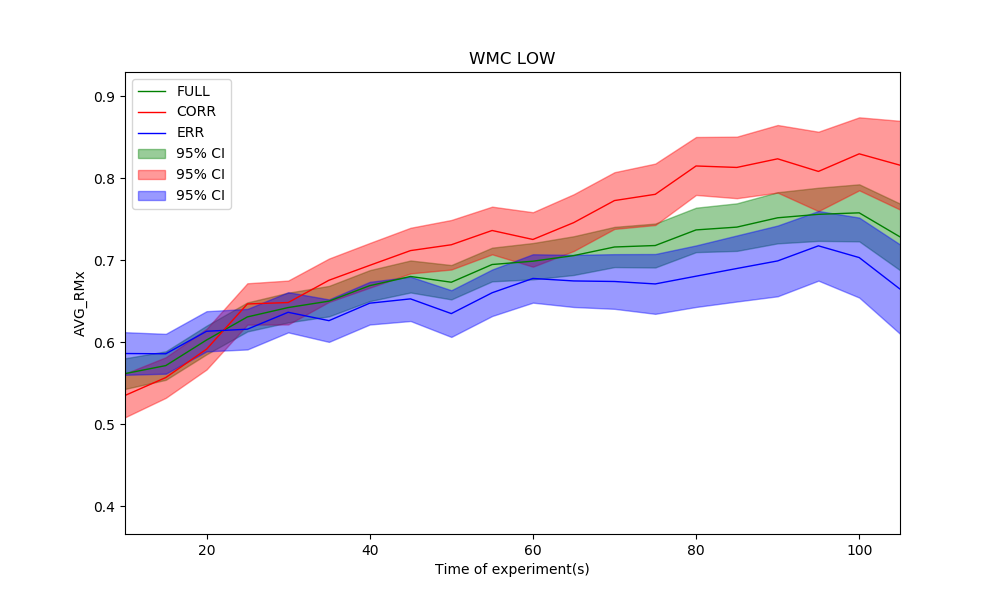

In [25]:
plot_CI([wmc_low_full, wmc_low_corr, wmc_low_err], 'AVG_RMx', ['FULL', 'CORR', 'ERR'], 'WMC LOW')

In [26]:
add_CI(wmc_med_full, 'AVG_RMx')
add_CI(wmc_med_corr, 'AVG_RMx')
add_CI(wmc_med_err, 'AVG_RMx')

<IPython.core.display.Javascript object>


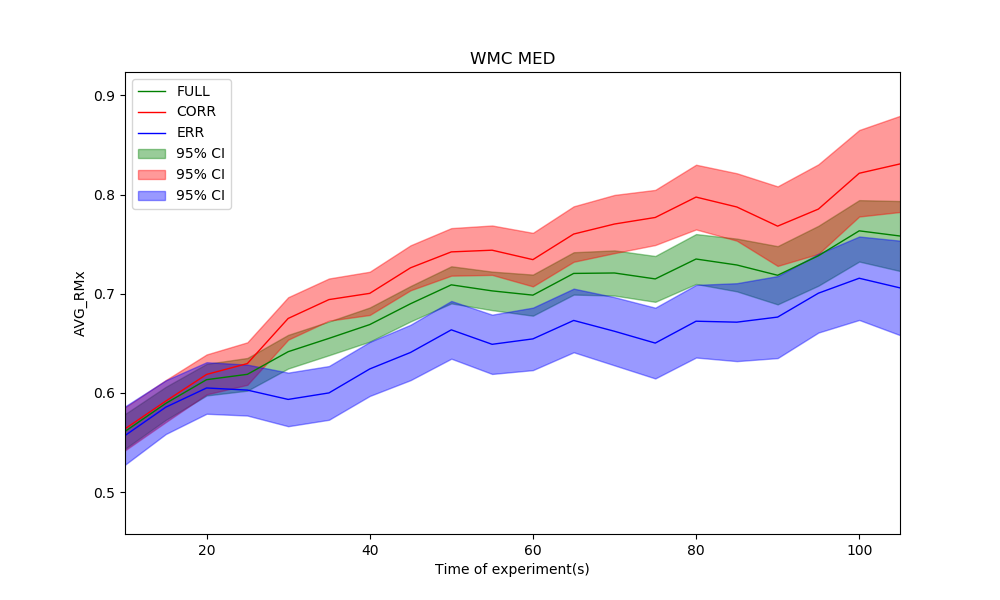

In [27]:
plot_CI([wmc_med_full, wmc_med_corr, wmc_med_err], 'AVG_RMx', ['FULL', 'CORR', 'ERR'], 'WMC MED')

In [28]:
add_CI(wmc_high_full, 'AVG_RMx')
add_CI(wmc_high_corr, 'AVG_RMx')
add_CI(wmc_high_err, 'AVG_RMx')

<IPython.core.display.Javascript object>


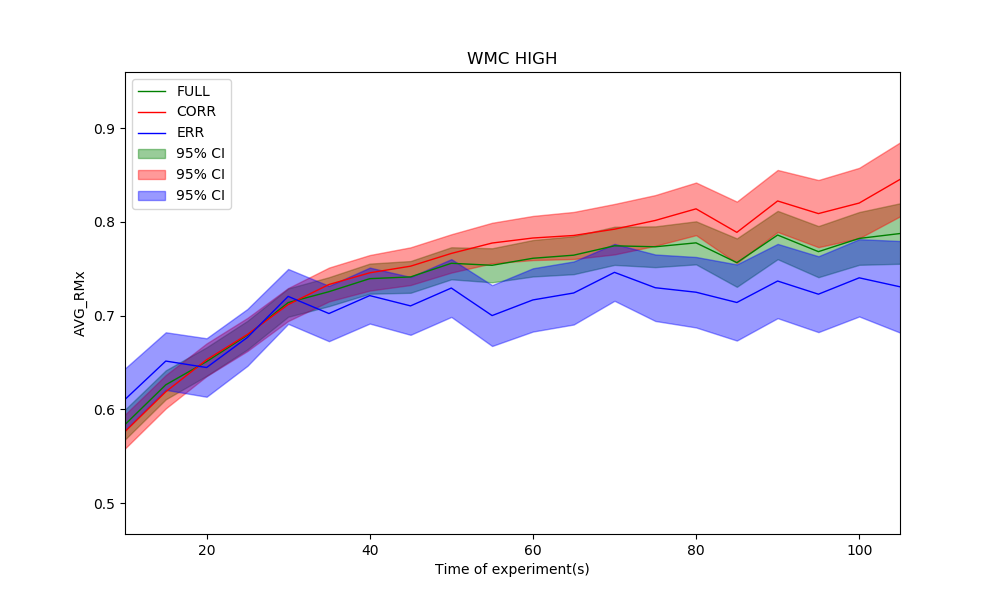

In [29]:
plot_CI([wmc_high_full, wmc_high_corr, wmc_high_err], 'AVG_RMx', ['FULL', 'CORR', 'ERR'], 'WMC HIGH')

<IPython.core.display.Javascript object>


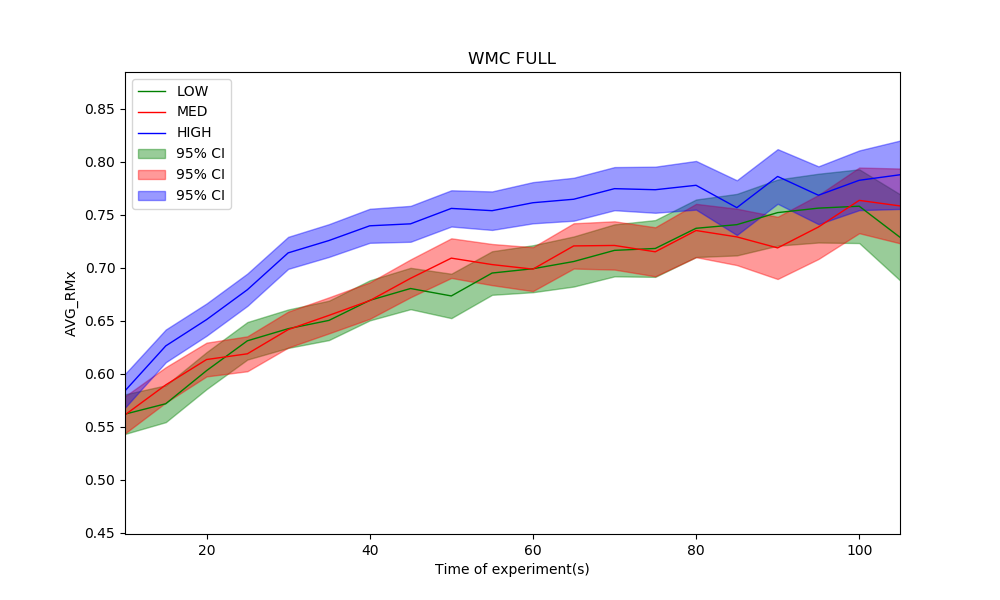

In [30]:
plot_CI([wmc_low_full, wmc_med_full, wmc_high_full], 'AVG_RMx', ['LOW', 'MED', 'HIGH'], 'WMC FULL')

<IPython.core.display.Javascript object>


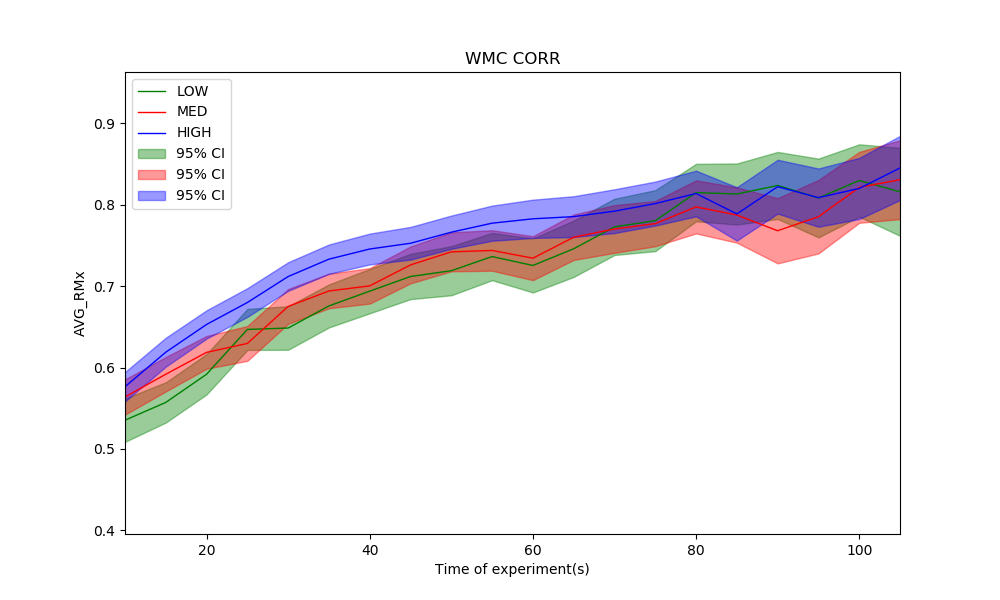

In [31]:
plot_CI([wmc_low_corr, wmc_med_corr, wmc_high_corr], 'AVG_RMx', ['LOW', 'MED', 'HIGH'], 'WMC CORR')

<IPython.core.display.Javascript object>


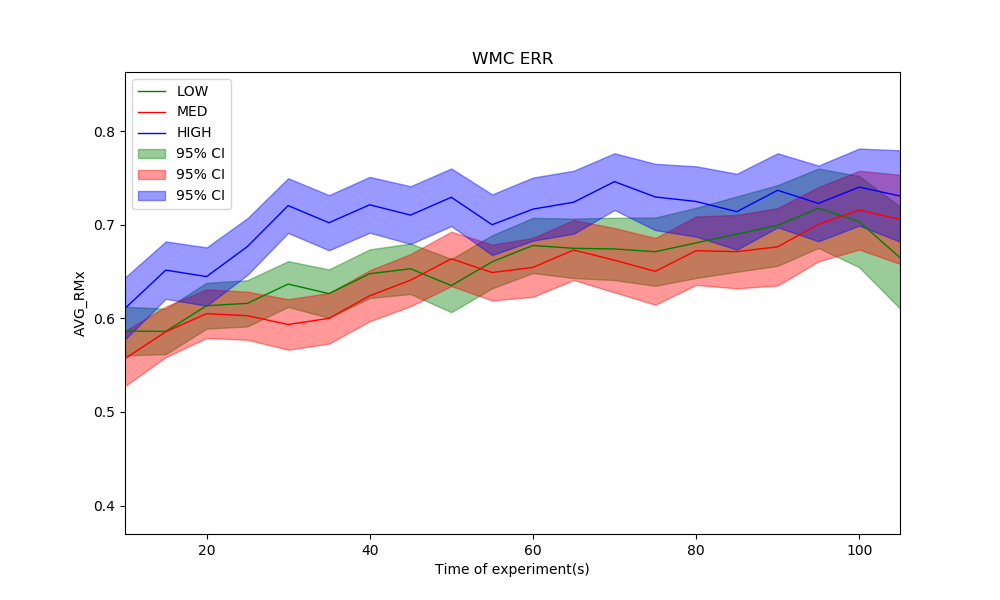

In [32]:
plot_CI([wmc_low_err, wmc_med_err, wmc_high_err], 'AVG_RMx', ['LOW', 'MED', 'HIGH'], 'WMC ERR')

# Prop FOx

In [33]:
add_CI(wmc_low_full, 'PROP_FOx')
add_CI(wmc_low_corr, 'PROP_FOx')
add_CI(wmc_low_err, 'PROP_FOx')

<IPython.core.display.Javascript object>


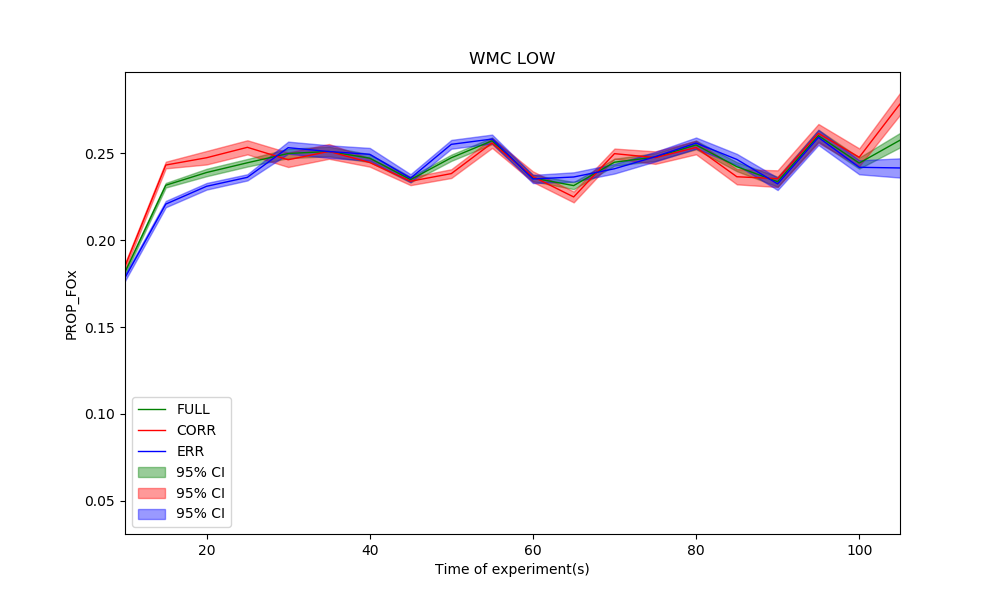

In [34]:
plot_CI([wmc_low_full, wmc_low_corr, wmc_low_err], 'PROP_FOx', ['FULL', 'CORR', 'ERR'], 'WMC LOW')

In [35]:
add_CI(wmc_med_full, 'PROP_FOx')
add_CI(wmc_med_corr, 'PROP_FOx')
add_CI(wmc_med_err, 'PROP_FOx')

<IPython.core.display.Javascript object>


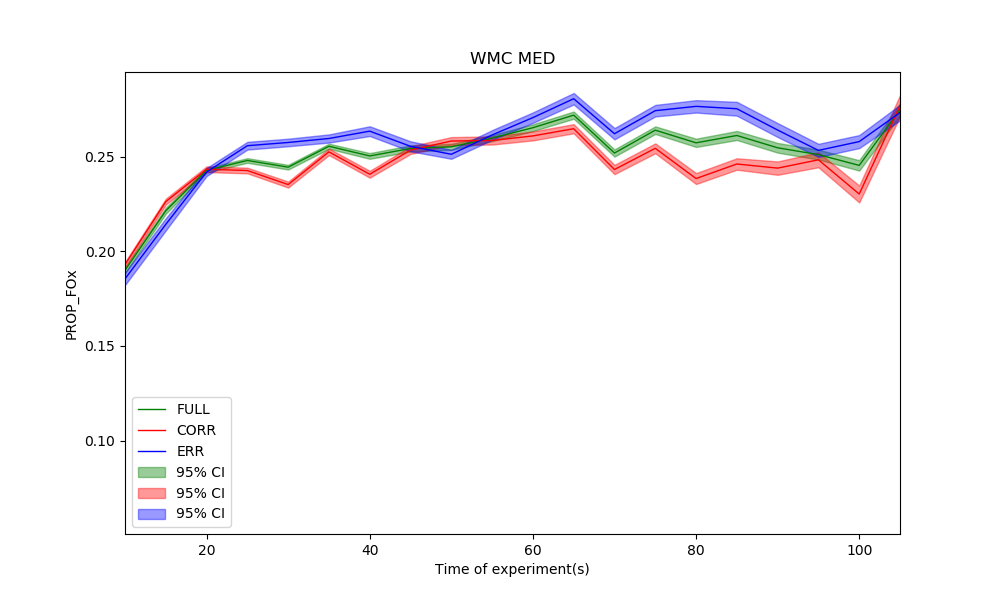

In [36]:
plot_CI([wmc_med_full, wmc_med_corr, wmc_med_err], 'PROP_FOx', ['FULL', 'CORR', 'ERR'], 'WMC MED')

In [37]:
add_CI(wmc_high_full, 'PROP_FOx')
add_CI(wmc_high_corr, 'PROP_FOx')
add_CI(wmc_high_err, 'PROP_FOx')

/home/bkroczek/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


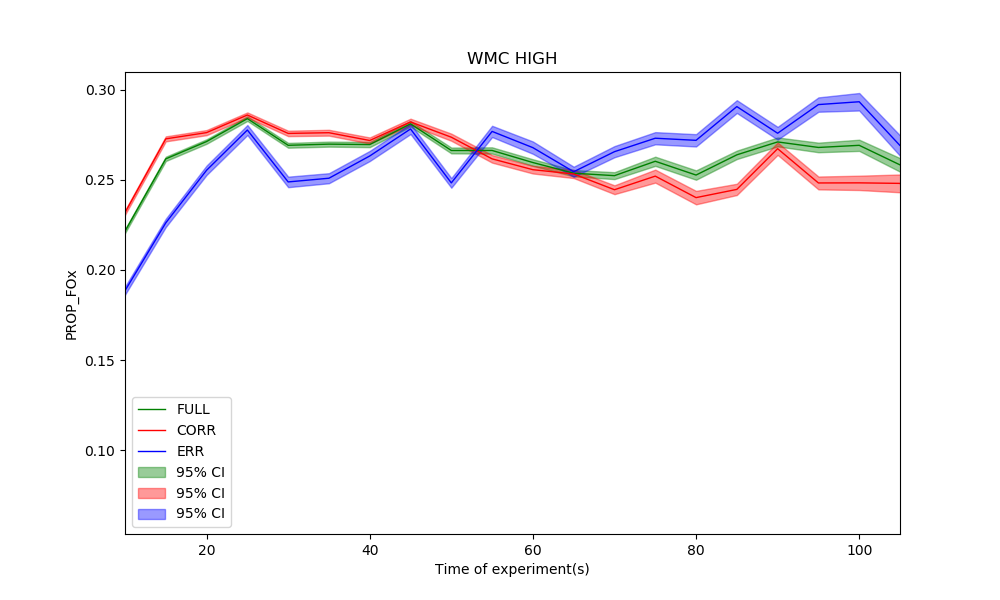

In [38]:
plot_CI([wmc_high_full, wmc_high_corr, wmc_high_err], 'PROP_FOx', ['FULL', 'CORR', 'ERR'], 'WMC HIGH')

/home/bkroczek/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


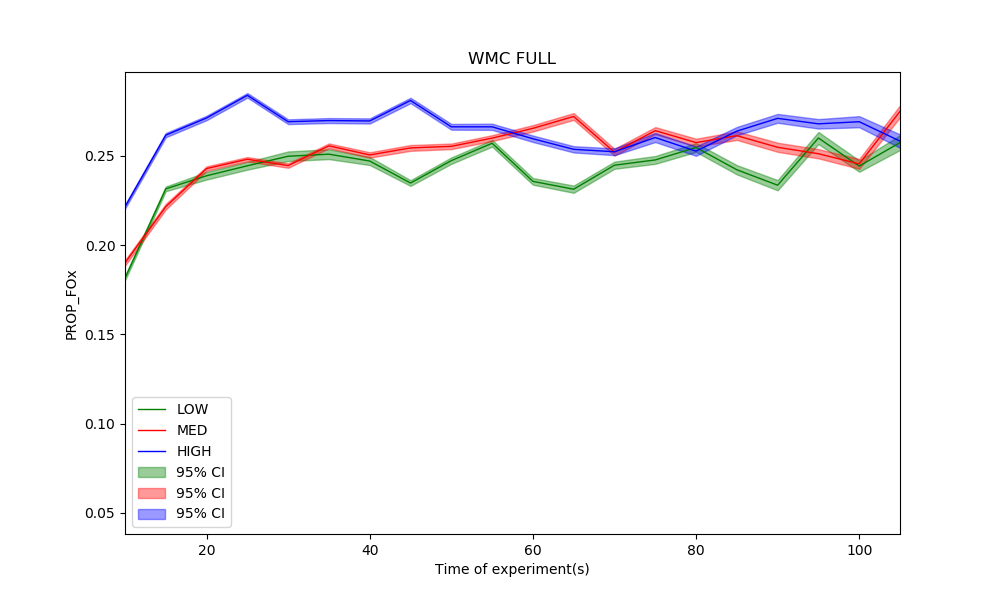

In [39]:
plot_CI([wmc_low_full, wmc_med_full, wmc_high_full], 'PROP_FOx', ['LOW', 'MED', 'HIGH'], 'WMC FULL')

/home/bkroczek/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


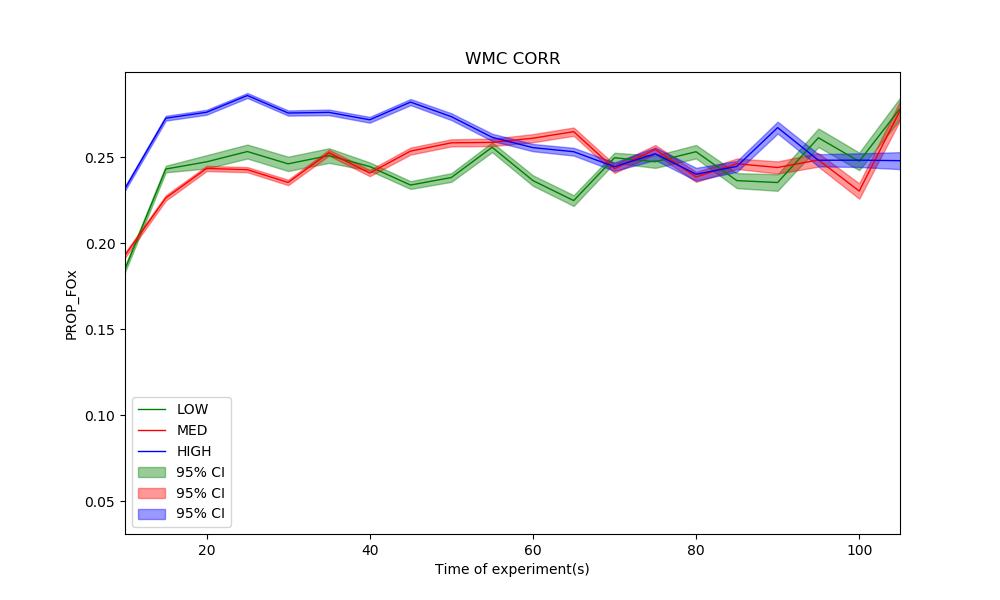

In [40]:
plot_CI([wmc_low_corr, wmc_med_corr, wmc_high_corr], 'PROP_FOx', ['LOW', 'MED', 'HIGH'], 'WMC CORR')

/home/bkroczek/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


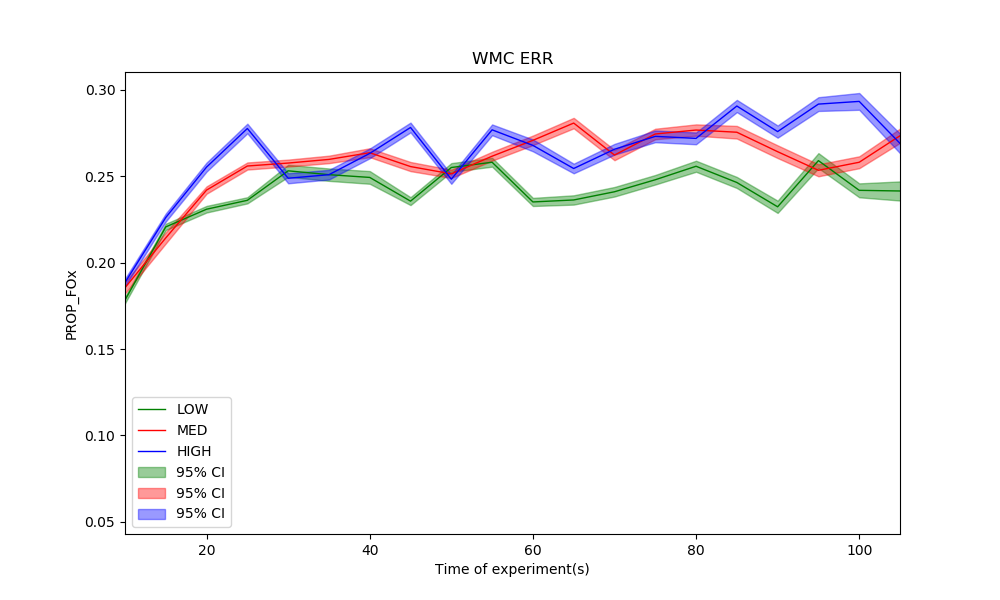

In [41]:
plot_CI([wmc_low_err, wmc_med_err, wmc_high_err], 'PROP_FOx', ['LOW', 'MED', 'HIGH'], 'WMC ERR')